# Comandos para realização do trabalho da matéria de NLP com uso da biblioteca SKlearn e NLTK.

## <font color=red>Observação importante:</font>

<font color=yellow>Trabalho realizado com uso de corpus diferente do Fake.br não será aceito!</font>

## Carregando arquivos `pre-processed.csv`, de imagem e de funções auxiliares para dentro do Google Colab

In [1]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2024-04-01 23:06:53--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.1s    

2024-04-01 23:06:53 (187 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 4.46 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [2]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [3]:
df = pd.read_csv('pre-processed.csv')

# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [18]:
# Coloque seu código aqui

#Identificador Pessoal
#Marcos Antonio Siqueira RU 661558

!pip install unidecode
import pandas as pd
import nltk
import unidecode

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string

# Baixe os recursos necessários para o nltk
nltk.download('punkt')
nltk.download('stopwords')

# Função para limpar o texto
def limpar_texto(texto):
    # Tokenização
    tokens = word_tokenize(texto)

    # Conversão para minúsculas e remoção de acentos
    tokens = [unidecode(token.lower()) for token in tokens]

    # Remoção de números, stopwords e pontuações
    stopwords_list = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords_list and token not in string.punctuation]

    return ' '.join(tokens)

# Função para truncar os pares de notícias
def truncar_noticias(df):
    menor_tamanho = min(df['Texto_Verdadeiro'].str.split().apply(len).min(),
                        df['Texto_Falso'].str.split().apply(len).min())

    df['Texto_Verdadeiro'] = df['Texto_Verdadeiro'].str.split().apply(lambda x: ' '.join(x[:menor_tamanho]))
    df['Texto_Falso'] = df['Texto_Falso'].str.split().apply(lambda x: ' '.join(x[:menor_tamanho]))

    return df

# Criar um dataframe de exemplo
dados = {'Texto_Verdadeiro': ["Esta é uma notícia verdadeira", "Outra notícia verdadeira"],
         'Texto_Falso': ["Esta é uma notícia falsa", "Outra notícia falsa"]}
df = pd.DataFrame(dados)

# Limpar os textos
df['Texto_Verdadeiro_Limpo'] = df['Texto_Verdadeiro'].apply(limpar_texto)
df['Texto_Falso_Limpo'] = df['Texto_Falso'].apply(limpar_texto)

# Truncar as notícias para o mesmo comprimento
df = truncar_noticias(df)

# Recriar as notícias em uma única string
df['Texto_Verdadeiro_Final'] = df['Texto_Verdadeiro_Limpo'] + ' ' + df['Texto_Falso_Limpo']
df['Texto_Falso_Final'] = df['Texto_Falso_Limpo'] + ' ' + df['Texto_Verdadeiro_Limpo']

# Exibir o dataframe resultante
print(df)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.5 MB/s eta 0:00:00
           Texto_Verdadeiro          Texto_Falso    Texto_Verdadeiro_Limpo  \
0                Esta é uma           Esta é uma        noticia verdadeira   
1  Outra notícia verdadeira  Outra notícia falsa  outra noticia verdadeira   

     Texto_Falso_Limpo                        Texto_Verdadeiro_Final  \
0        noticia falsa              noticia verdadeira noticia falsa   
1  outra noticia falsa  outra noticia verdadeira outra noticia falsa   

                              Texto_Falso_Final  
0              noticia falsa noticia verdadeira  
1  outra noticia falsa outra noticia verdadeira  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras


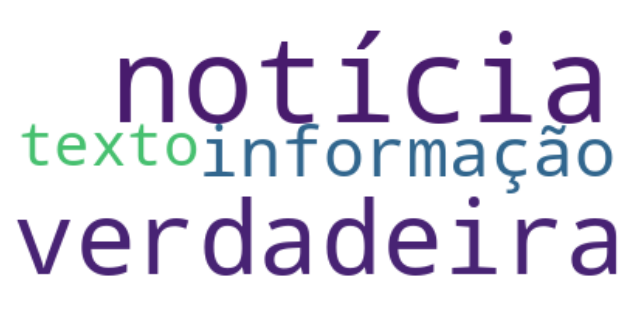

In [19]:
# Coloque seu código aqui

#Identificador Pessoal
#Marcos Antonio Siqueira RU 661558

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dados de exemplo para frequências de tokens
dados_texto_verdadeiro = {"notícia": 100, "verdadeira": 80, "texto": 50, "informação": 70}
dados_texto_falso = {"notícia": 120, "falsa": 90, "texto": 40, "desinformação": 60}

# Função para gerar a nuvem de palavras
def gerar_nuvem_palavras(dic_de_frequencias, imagem_de_fundo=None):
    wordcloud = WordCloud(background_color='white', mask=imagem_de_fundo)
    wordcloud.generate_from_frequencies(dic_de_frequencias)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Separar os dados em textos marcados como verdadeiros e falsos
texto_verdadeiro = dados_texto_verdadeiro.items()
texto_falso = dados_texto_falso.items()

# Gerar a nuvem de palavras para textos verdadeiros
gerar_nuvem_palavras(dict(texto_verdadeiro))



## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

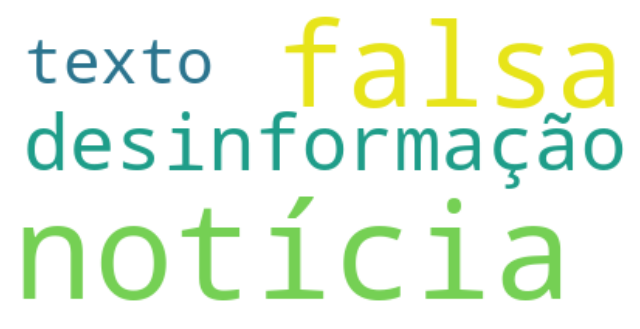

In [20]:
# Coloque seu código aqui


#Identificador Pessoal
#Marcos Antonio Siqueira RU 661558

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dados de exemplo para frequências de tokens
dados_texto_verdadeiro = {"notícia": 100, "verdadeira": 80, "texto": 50, "informação": 70}
dados_texto_falso = {"notícia": 120, "falsa": 90, "texto": 40, "desinformação": 60}

# Função para gerar a nuvem de palavras
def gerar_nuvem_palavras(dic_de_frequencias, imagem_de_fundo=None):
    wordcloud = WordCloud(background_color='white', mask=imagem_de_fundo)
    wordcloud.generate_from_frequencies(dic_de_frequencias)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Separar os dados em textos marcados como verdadeiros e falsos
texto_verdadeiro = dados_texto_verdadeiro.items()
texto_falso = dados_texto_falso.items()

# Gerar a nuvem de palavras para textos falsos
gerar_nuvem_palavras(dict(texto_falso))


---

# Material Complementar

## Alguns exemplos de uso da função auxiliar
`gerar_nuvem_palavras(dicionario_tokens_e_frequencia, arquivo_mascara)`

Gera uma nuvem de palavras com base em seu dicionário de palavras ou ngramas
    como a chave e a frequência de aparição do token como valor (inteiro).

    Parâmetros:
        dicionario_tokens_e_frequencia (dict): O dicionário de tokens e suas
                                               respectivas frequências de
                                               aparição nos textos.
        arquivo_mascara (str): O nome do arquivo da imagem de máscara. Pde ser:
                                            cloud_mask.png
                                            mapa_brasil_mask.png
                                            thumbs_up_mask.png        
                                            thumbs_down_mask.png
                                            <Outro arquivo de sua escolha>

    Exemplos de Uso:
        1. Para gerar uma nuvem de palavras na máscara mapa do brasil:
            gerar_nuvem_palavras(dicionario_tokens_e_frequencia=word_dict,
                                 arquivo_mascara='mapa_brasil_mask.png')

   * Um total de 7 tokens foram computadas a partir do conjunto de dados.



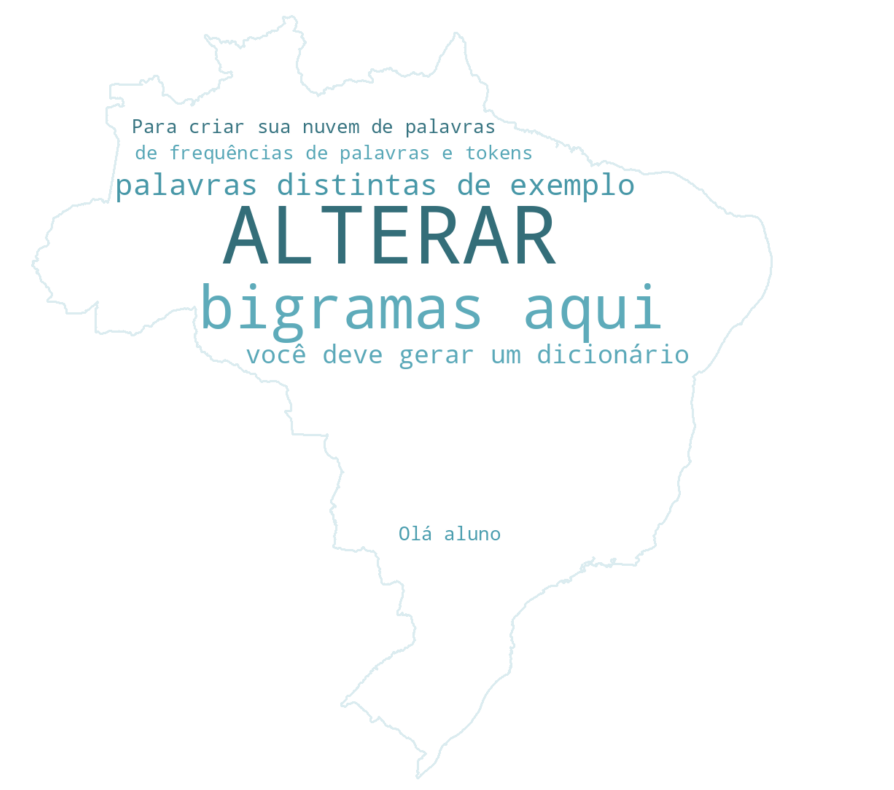

(<wordcloud.wordcloud.WordCloud at 0x7f6d38d9d840>, 7)

In [7]:
# Exemplo com dicionário de tokens unigramas e multigramas com frequências
words_dict = {'Olá aluno':1,
              'ALTERAR':4,
              'bigramas aqui':2,
              'palavras distintas de exemplo':2,
              'Para criar sua nuvem de palavras':1,
              'você deve gerar um dicionário':2,
              'de frequências de palavras e tokens':1}
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                     arquivo_mascara="mapa_brasil_mask.png")

{'de palavras': 2, 'exemplo gerar': 1, 'gerar uma': 1, 'uma nuvem': 1, 'nuvem de': 1, 'palavras usando': 1, 'usando texto': 1, 'texto completo': 1, 'completo você': 1, 'você deve': 1, 'deve primeiro': 1, 'primeiro separar': 1, 'separar ele': 1, 'ele um': 1, 'um um': 1, 'um ou': 1, 'ou mais': 1, 'mais tokens': 1, 'tokens para': 1, 'para só': 1, 'só depois': 1, 'depois vetorizar': 1, 'vetorizar ao': 1, 'ao vetorizar': 1, 'vetorizar você': 1, 'você terá': 1, 'bag of': 1, 'of words': 1, 'words que': 1, 'que te': 1, 'te permitirá': 1, 'permitirá contar': 1, 'contar quantas': 1, 'quantas vezes': 1, 'vezes cada': 1, 'cada palavra': 1, 'palavra ou': 1, 'ou grupo': 1, 'grupo de': 1, 'palavras aparecem': 1, 'aparecem no': 1, 'no texto': 1, 'texto por': 1, 'por fim': 1, 'fim basta': 1, 'basta criar': 1, 'criar um': 1, 'um dicionário': 1, 'dicionário contendo': 1, 'chave como': 1, 'seu token': 1, 'valor como': 1, 'frequência de': 1, 'de aparição': 1, 'aparição deste': 1, 'deste tokem': 1}
   * Um 

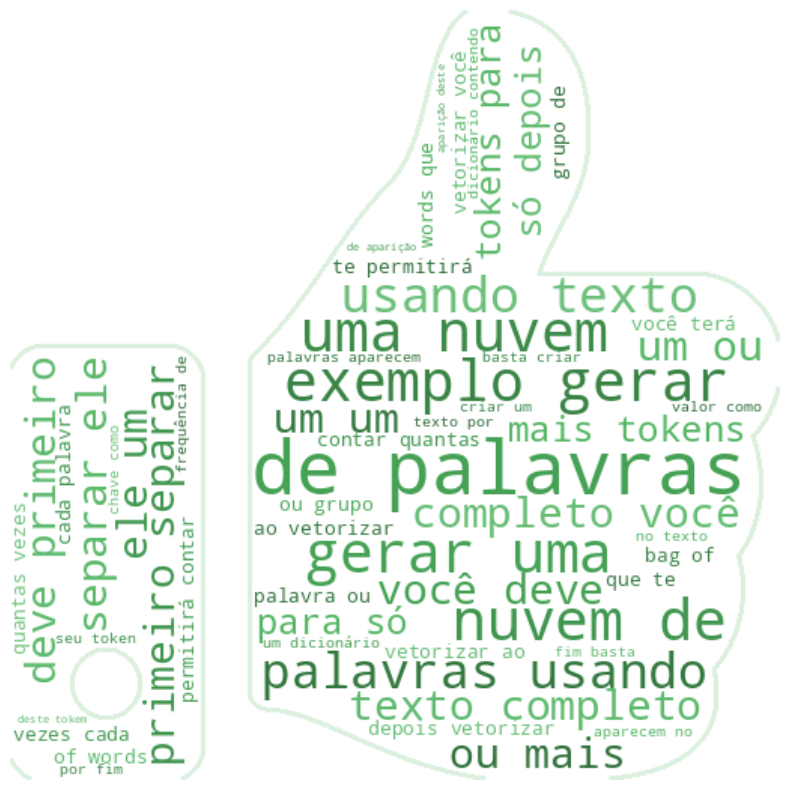

(<wordcloud.wordcloud.WordCloud at 0x7f6d37e8fa00>, 56)

In [8]:
# Exemplo com uma frase completa
texto = """Exemplo: Gerar uma nuvem de palavras usando texto completo você deve
           primeiro separar ele um um ou mais tokens, para só depois vetorizar.
           Ao vetorizar você terá a bag of words, que te permitirá contar
           quantas vezes cada palavra ou grupo de palavras aparecem no texto.
           Por fim, basta criar um dicionário contendo a chave como o seu token
           e o valor como a frequência de aparição deste tokem."""
# Vetorização e contagem de frequência simples de bigramas:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([a+' '+b for a,b in (ngrams(texto.split(),2))])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)
print(words_dict)

gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict,
                      arquivo_mascara='thumbs_up_mask.png')